<a href="https://colab.research.google.com/github/Sindhura-tr/Machine-Learning-satsun-5-7/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Time Series Decomposition
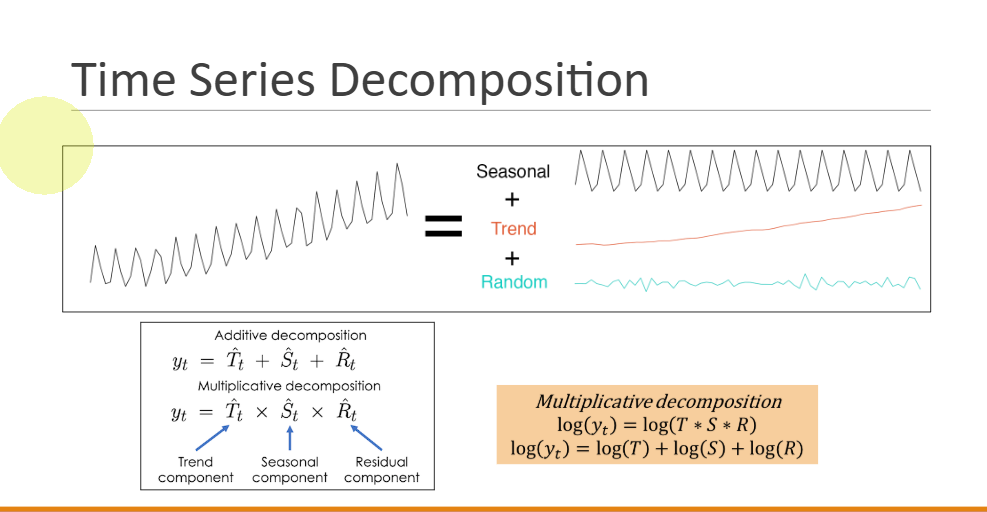

In [1]:
%pip install pmdarima

  Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
   ---------------------------------- ----- 524.3/613.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 613.3/613.3 kB 1.7 MB/s eta 0:00:00
Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load the dataset

In [3]:
import pandas as pd
df = pd.read_csv(r'D:\Machine-Learning\repository\Timeseries_Analysis\AirPassengers.csv',index_col="Month",parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.resample("YE").sum()

,Passengers
Month,
1949-12-31,1520
1950-12-31,1676
1951-12-31,2042
1952-12-31,2364
1953-12-31,2700
1954-12-31,2867
1955-12-31,3408
1956-12-31,3939
1957-12-31,4421


In [5]:
df.resample("YE").mean()

,Passengers
Month,
1949-12-31,126.666667
1950-12-31,139.666667
1951-12-31,170.166667
1952-12-31,197.000000
1953-12-31,225.000000
1954-12-31,238.916667
1955-12-31,284.000000
1956-12-31,328.250000
1957-12-31,368.416667


In [6]:
df.resample("QE").median()

,Passengers
Month,
1949-03-31,118.0
1949-06-30,129.0
1949-09-30,148.0
1949-12-31,118.0
1950-03-31,126.0
1950-06-30,135.0
1950-09-30,170.0
1950-12-31,133.0
1951-03-31,150.0


## Visualize time series
    Seasonality
    Trend
    Residual

In [7]:
import matplotlib.pyplot as plt

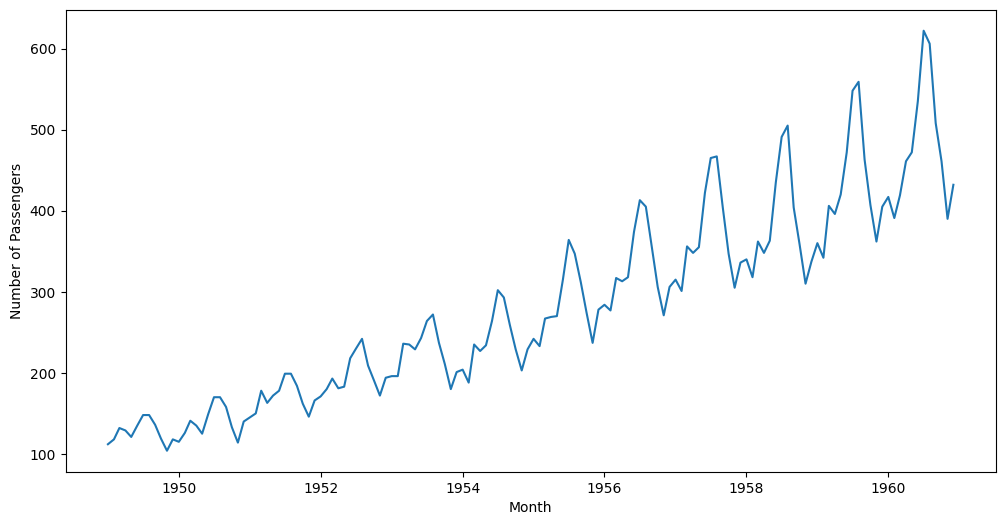

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df["Passengers"])
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.show()

## Decomposition

In [9]:
from statsmodels.tsa.seasonal import  seasonal_decompose


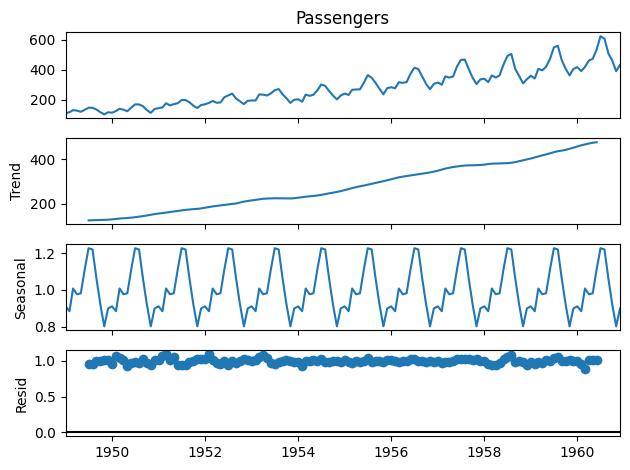

In [10]:
s = seasonal_decompose(df["Passengers"],model="mul")
s.plot()
plt.show()

## Trend

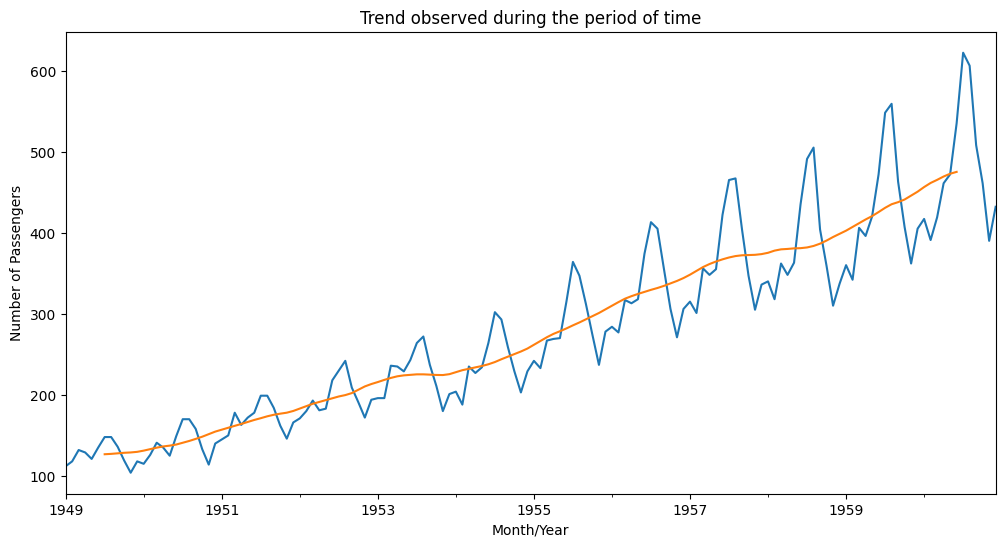

In [11]:
plt.figure(figsize=(12,6))
s.observed.plot()
s.trend.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Trend observed during the period of time")
plt.show()

## Seasonality

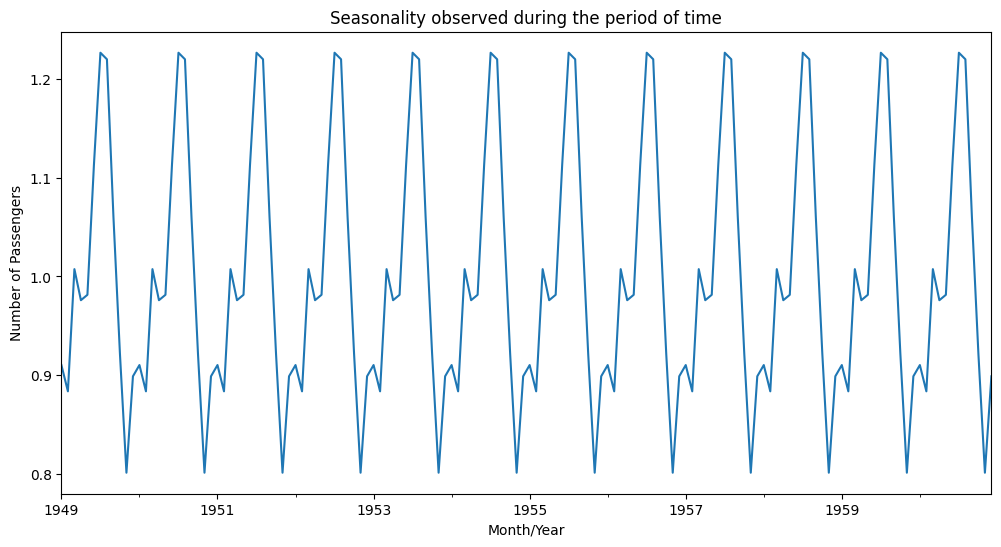

In [12]:
plt.figure(figsize=(12,6))
s.seasonal.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Seasonality observed during the period of time")
plt.show()

## Residual

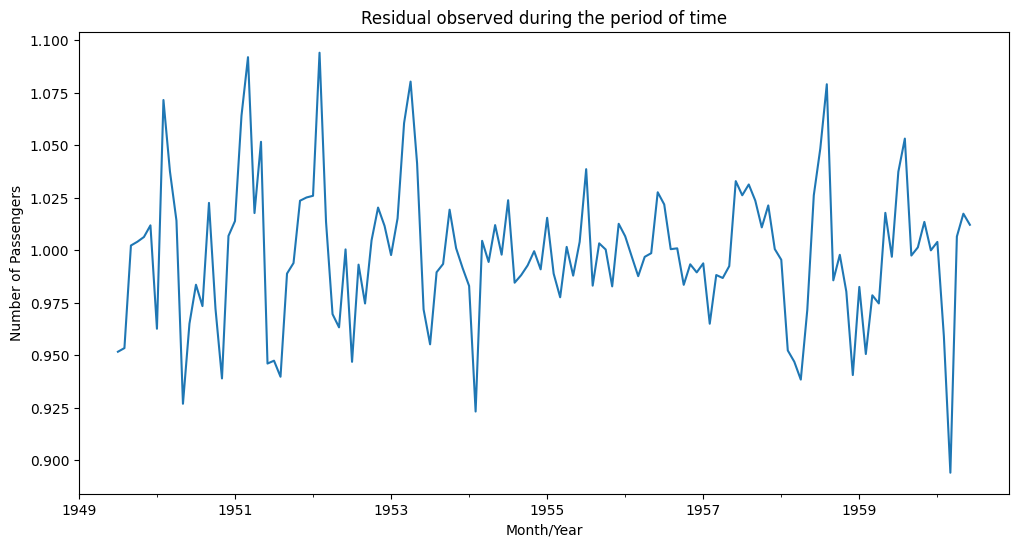

In [13]:
plt.figure(figsize=(12,6))
s.resid.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Residual observed during the period of time")
plt.show()

## Forecasting of Passengers

If you get an error while import auto_arima, then install below packages as per versions
pip install numpy==1.24.4
pip install pmdarima==2.0.3

In [ ]:
pip install numpy==1.24.4

In [ ]:
pip install pmdarima==2.0.3

In [14]:
from pmdarima.arima import auto_arima

In [15]:
model = auto_arima(df["Passengers"],seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.41 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.13 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.28 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.15 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.33 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.23 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.46 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

In [16]:
model.order

(2, 1, 1)

## Forecast for next 4 years
months = 4*12 = 48 month

In [17]:
months = 48 # 4*12
forecast,conf = model.predict(n_periods=months,return_conf_int=True)

In [18]:
forecast

1961-01-01    445.634867
1961-02-01    420.394915
1961-03-01    449.198204
1961-04-01    491.839805
1961-05-01    503.394310
1961-06-01    566.862262
1961-07-01    654.259968
1961-08-01    638.597263
1961-09-01    540.883502
1961-10-01    494.126368
1961-11-01    423.332445
1961-12-01    465.507302
1962-01-01    479.290538
1962-02-01    454.176477
1962-03-01    483.086587
1962-04-01    525.818826
1962-05-01    537.450238
1962-06-01    600.983447
1962-07-01    688.436524
1962-08-01    672.820802
1962-09-01    575.146906
1962-10-01    528.423598
1962-11-01    457.658376
1962-12-01    499.857588
1963-01-01    513.661488
1963-02-01    488.564961
1963-03-01    517.489948
1963-04-01    560.234811
1963-05-01    571.876935
1963-06-01    635.419233
1963-07-01    722.880022
1963-08-01    707.270843
1963-09-01    609.602499
1963-10-01    562.883903
1963-11-01    492.122679
1963-12-01    534.325282
1964-01-01    548.132060
1964-02-01    523.037975
1964-03-01    551.965035
1964-04-01    594.711656


In [19]:
conf

array([[423.34475548, 467.92497924],
       [394.23526936, 446.55456044],
       [419.83152508, 478.56488283],
       [460.37602689, 523.30358241],
       [470.38017986, 536.40844015],
       [532.69901311, 601.02551121],
       [619.22079627, 689.29914021],
       [602.8794773 , 674.31504859],
       [504.63083596, 577.13616766],
       [457.44545451, 530.80728116],
       [386.30333511, 460.36155409],
       [428.19078927, 502.82381479],
       [433.49688211, 525.08419342],
       [405.10817988, 503.24477458],
       [431.15486806, 535.01830554],
       [471.83972448, 579.79792696],
       [481.87270529, 593.02777165],
       [544.1556761 , 657.81121848],
       [630.60781427, 746.26523426],
       [614.17818776, 731.46341566],
       [515.8313901 , 634.46242163],
       [468.54306576, 588.3041302 ],
       [397.29620177, 518.02055123],
       [439.07885249, 560.6363228 ],
       [446.32606733, 580.99690814],
       [418.31710911, 558.8128131 ],
       [444.62310136, 590.35679537],
 

In [20]:
df_forecast = forecast.to_frame()
df_forecast

,0
1961-01-01,445.634867
1961-02-01,420.394915
1961-03-01,449.198204
1961-04-01,491.839805
1961-05-01,503.394310
1961-06-01,566.862262
1961-07-01,654.259968
1961-08-01,638.597263
1961-09-01,540.883502
1961-10-01,494.126368


In [21]:
df_forecast.columns = ["Forecast"]
df_forecast.index.name = "Month"

In [22]:
df_forecast

,Forecast
Month,
1961-01-01,445.634867
1961-02-01,420.394915
1961-03-01,449.198204
1961-04-01,491.839805
1961-05-01,503.394310
1961-06-01,566.862262
1961-07-01,654.259968
1961-08-01,638.597263
1961-09-01,540.883502


In [23]:
df_forecast[["Lower Confidence Bound","Upper COnfidence Bound"]] = conf
df_forecast

,Forecast,Lower Confidence Bound,Upper COnfidence Bound
Month,,,
1961-01-01,445.634867,423.344755,467.924979
1961-02-01,420.394915,394.235269,446.554560
1961-03-01,449.198204,419.831525,478.564883
1961-04-01,491.839805,460.376027,523.303582
1961-05-01,503.394310,470.380180,536.408440
1961-06-01,566.862262,532.699013,601.025511
1961-07-01,654.259968,619.220796,689.299140
1961-08-01,638.597263,602.879477,674.315049
1961-09-01,540.883502,504.630836,577.136168


In [24]:
df_forecast = df_forecast.round(0).astype(int)
df_forecast

,Forecast,Lower Confidence Bound,Upper COnfidence Bound
Month,,,
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577


In [25]:
df_forecast.to_csv("Forecasted Results.csv")

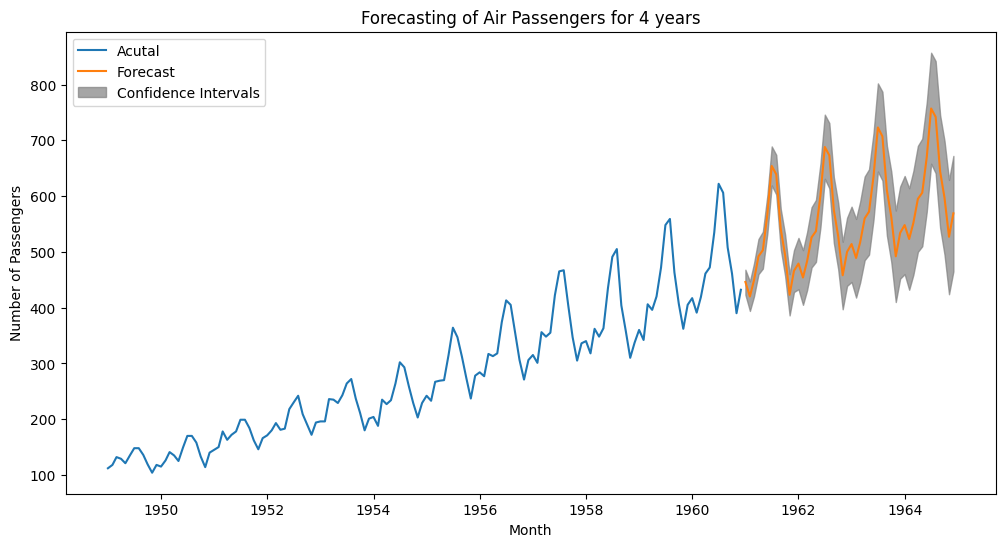

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df["Passengers"],label="Acutal")
plt.plot(df_forecast["Forecast"],label="Forecast")
plt.fill_between(df_forecast.index,df_forecast["Lower Confidence Bound"],df_forecast["Upper COnfidence Bound"],color="gray",alpha=0.7,label="Confidence Intervals")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Forecasting of Air Passengers for 4 years")
plt.legend()
plt.show()